Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.00



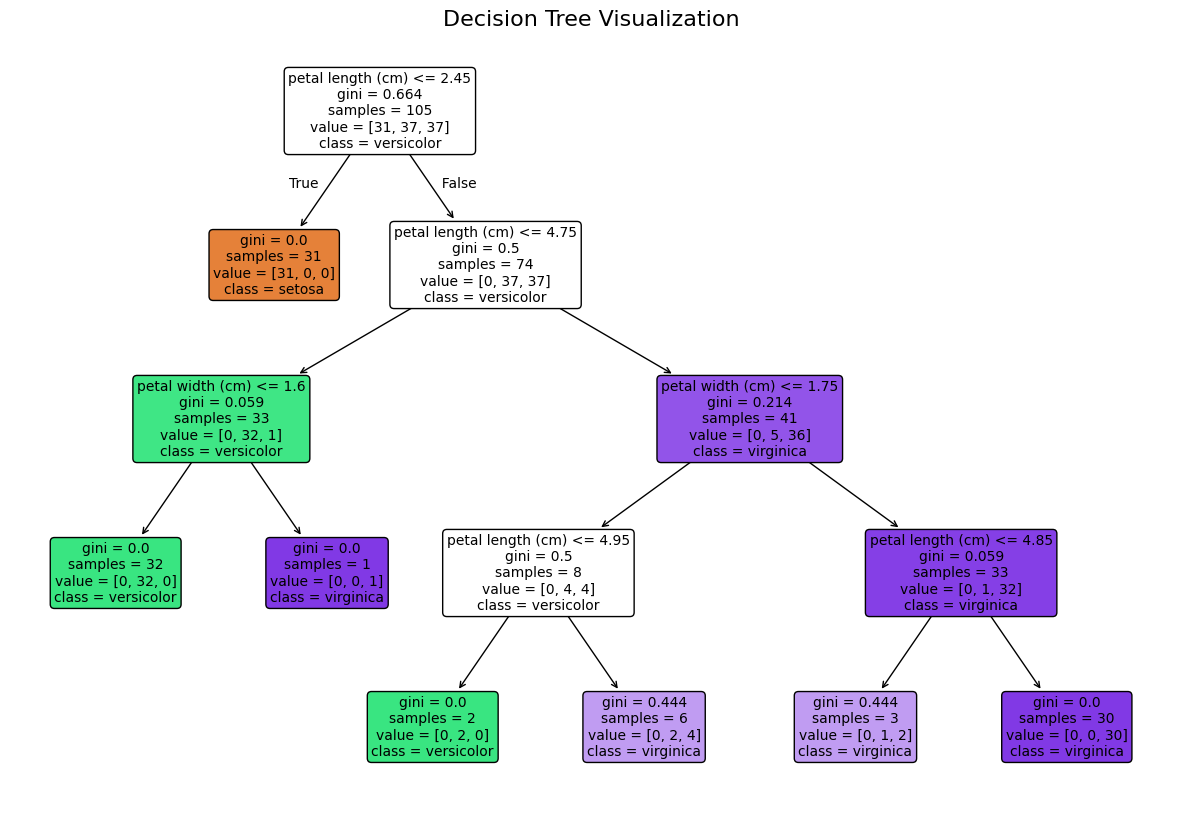

Decision Tree Rules:

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- class: 2
|   |   |   |--- petal length (cm) >  4.85
|   |   |   |   |--- class: 2



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, accuracy_score

# Load a dataset (using Iris dataset for simplicity)
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# Export tree rules as text
print("Decision Tree Rules:\n")
tree_rules = export_text(model, feature_names=data.feature_names)
print(tree_rules)
